In [8]:
import geopandas as gpd
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly import __version__
%matplotlib inline
import datetime as dt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()
import contextily as ctx
import time
import warnings
warnings.filterwarnings('ignore')

# 1. Import Your Network & Install Packages
* yaml file should have theese packages (geopandas, contextly, plotly/cufflinks, pandas, tqdm), but in the case you don't have it, download:


```linux
conda install geopandas pandas
conda install -c conda-forge contextily
conda install -c conda-forge cufflinks-py
conda install -c conda-forge tqdm
conda install -c conda-forge opencv
```

> Or you can set up enviroment via YAML file:

```linux
conda env create -f NetworkViz.yml 
conda activate networkviz
```


In [2]:
network = gpd.read_file("../ShapeFiles/DFW.shp")


In [3]:
network.head()

osm_id                  name        highway waterway aerialway barrier  \
0  9939353                  None  motorway_link     None      None    None   
1  9941554   Center Garage Drive        service     None      None    None   
2  9950888      County Line Road        service     None      None    None   
3  9957193                  None        service     None      None    None   
4  9970552  South Airfield Drive      secondary     None      None    None   

  man_made  z_order                                         other_tags  \
0     None        9  "lanes"=>"1","oneway"=>"yes","tiger:cfcc"=>"A6...   
1     None        0  "oneway"=>"yes","tiger:cfcc"=>"A63","tiger:cou...   
2     None        0  "tiger:cfcc"=>"A41","tiger:county"=>"Dallas, T...   
3     None        0                               "surface"=>"asphalt"   
4     None        6  "oneway"=>"yes","tiger:cfcc"=>"A41","tiger:cou...   

                                            geometry  
0  LINESTRING (-97.02470 32.92344, -97.02411 32.9...  
1  LINESTRING (-97.03358 32.85748, -97.03351 32.8...  
2  LINESTRING (-97.02814 32.86604, -97.02828 32.8...  
3  LINESTRING (-97.02247 32.91945, -97.02208 32.9...  
4  LINESTRING (-97.01775 32.86910, -97.01788 32.8...

# 2. Vizualize A Network
You only need 4 (maybe 5) lines of code to plot a nice looking network

```python

ST_TERRAIN = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png' # set your background tile
tmp = cleaned.to_crs(epsg=3857) # project your netork epsg 3857 (contextily requires this projection)
ax = tmp.plot(figsize=(12,15)) # plot and set your figure size
ctx.add_basemap(ax,zoom=15,url=ST_TERRAIN) # add your background tile 
ax.set_axis_off() # optional - take off the axis
```

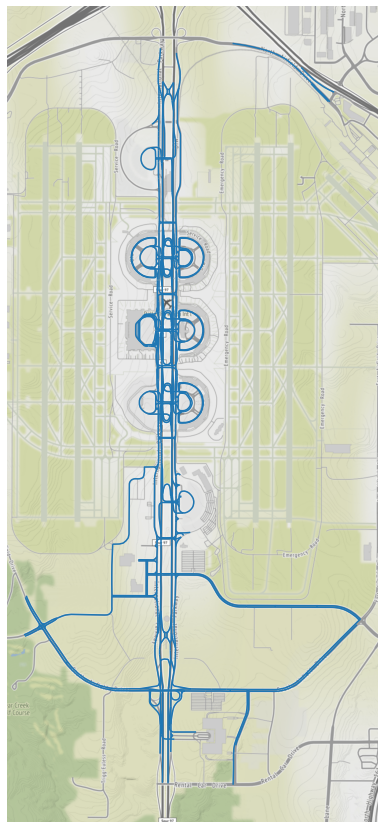

In [4]:
categories = ['motorway_link', 'secondary', 'tertiary',
       'secondary_link', 'tertiary_link',  'motorway']
cleaned = network.loc[network['highway'].isin(categories)]
cleaned.reset_index(inplace=True)
ST_TERRAIN = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
tmp = cleaned.to_crs(epsg=3857) 
ax = tmp.plot(figsize=(12,15))
ctx.add_basemap(ax,zoom=15,url=ST_TERRAIN)
ax.set_axis_off()

# 3. Matching Networks
Below is my first attempt to match the networks as bast as possible. It was not a succesfful attempt. 
Also, this code is useful for visualizing, so you don't need to run this. Please skip and go to 4

In [5]:
import sumolib
from shapely.geometry import LineString, Point, Polygon
net = sumolib.net.readNet('../Example_Files/SUMO_Input_Files/DFW2.net.xml')
radius = 10
sumo = []
distance = []
speed = []
for i,geom in enumerate(tqdm_notebook(cleaned['geometry'])):
    osm_id = cleaned['osm_id'][i]
    linestring = LineString(geom)
    list_geom = list(linestring.coords)
    middle_index = round(len(list_geom)/2)
    (lon,lat) = list_geom[middle_index]
    x, y = net.convertLonLat2XY(lon, lat)
    edges = net.getNeighboringEdges(x, y, radius)
    if len(edges) > 0:
        try:
            distancesAndEdges = sorted([(dist, edge) for edge, dist in edges])
            dist, closestEdge = distancesAndEdges[0]
            string = str(closestEdge)
            string = string.split(" ")
            string = string[1].split('"')
            distance.append(dist)
            sumo.append(string[1])
        except:
            distance.append(float('nan'))
            sumo.append(float('nan'))
    else:
        distance.append(float('nan'))
        sumo.append(float('nan'))
    speed.append(np.random.normal(.8,.15,1)[0])
cleaned['sumo_id'] = sumo
cleaned['distance'] = distance
cleaned['relativeSpeed'] = speed

In [6]:
cleaned.to_file("../ShapeFiles/DFW_With_Ids.shp",index=False)
net = gpd.read_file("../ShapeFiles/DFW_With_Ids.shp")


# 4.a. Building Video From Frames

```tqdm_notebook``` allows you see your loops progress via progress bar. Great for the 
impatient and performance testing

> NOTE: Realtive Speed is contrived from a random normal distribution, so this is only play data


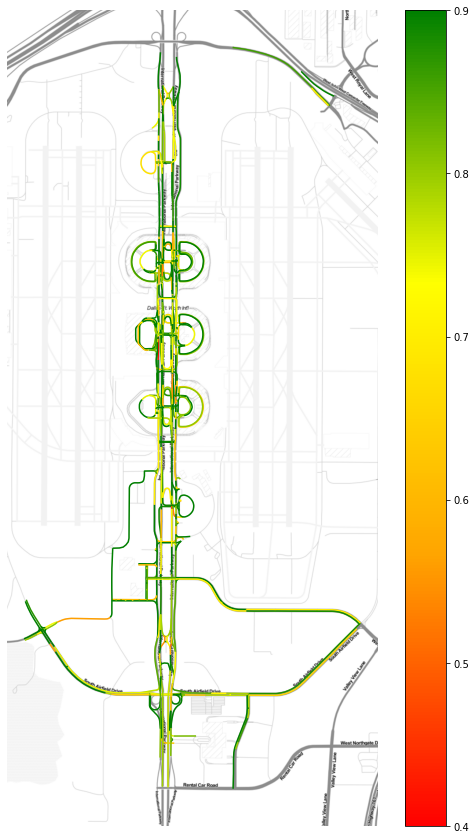

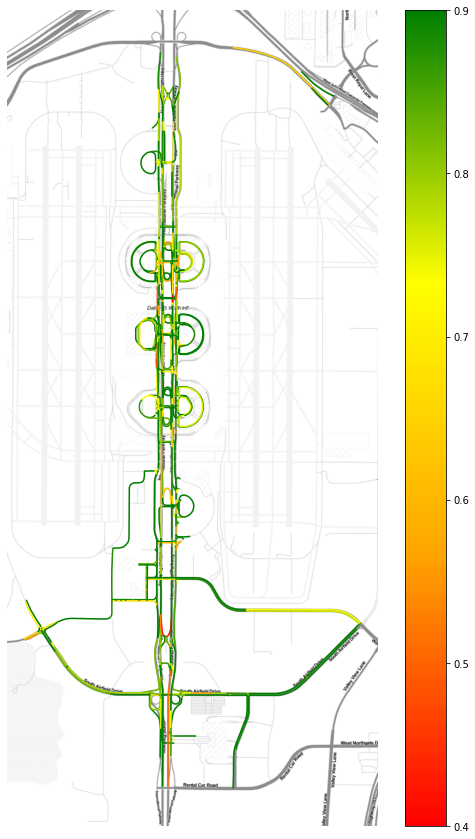

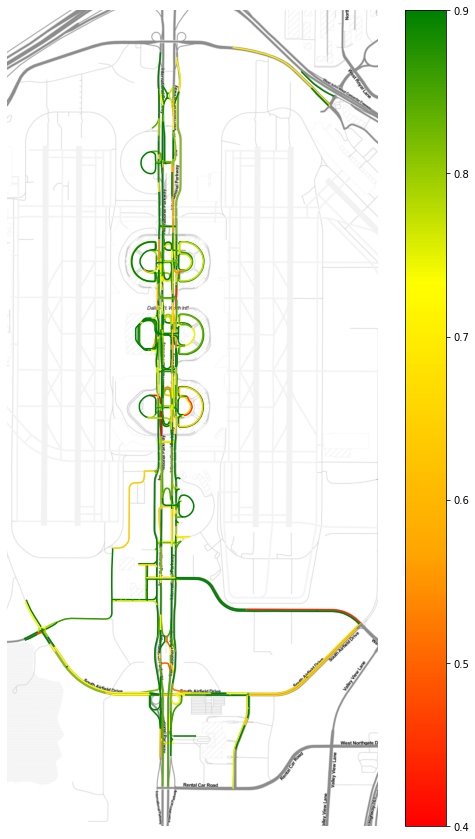

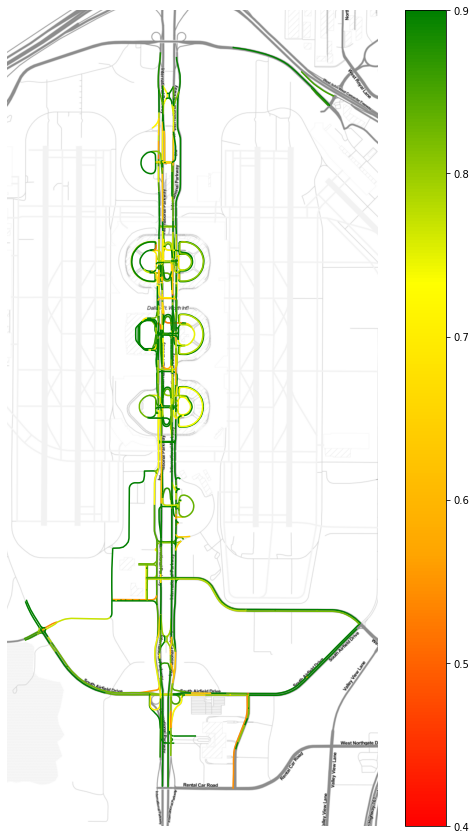

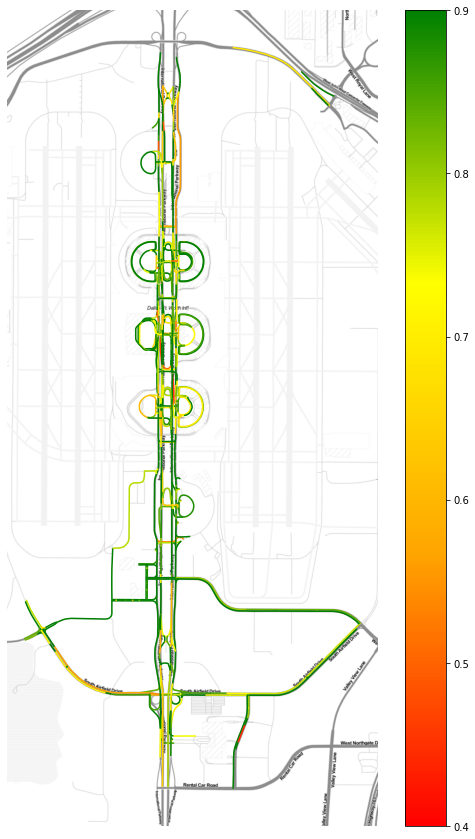

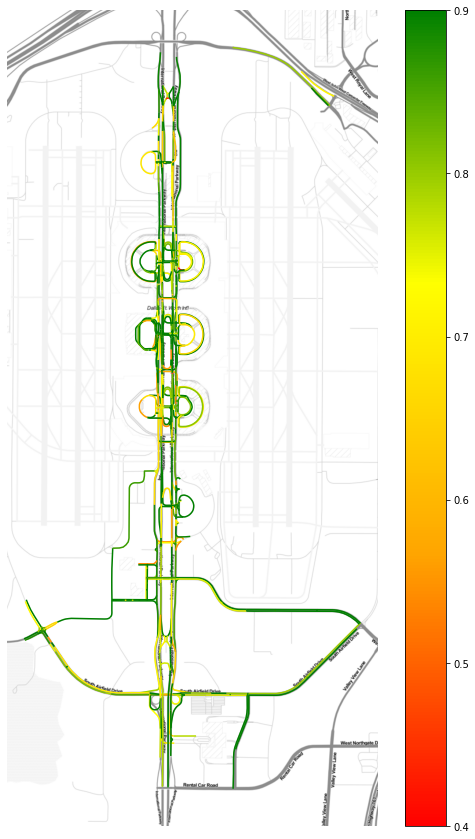

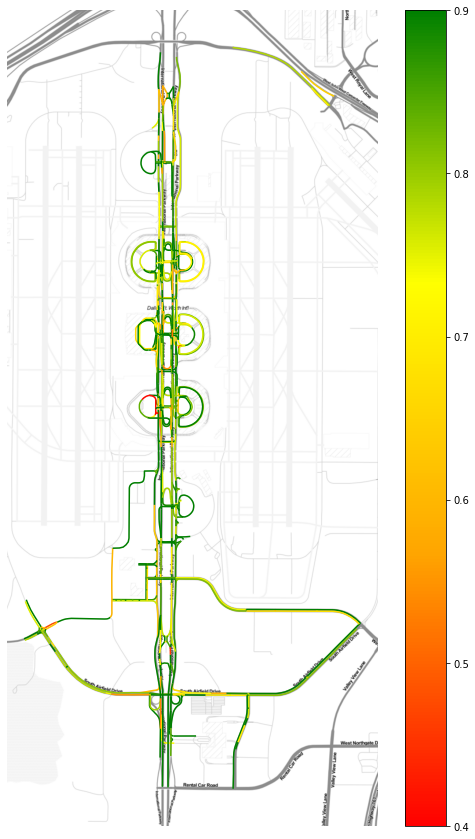

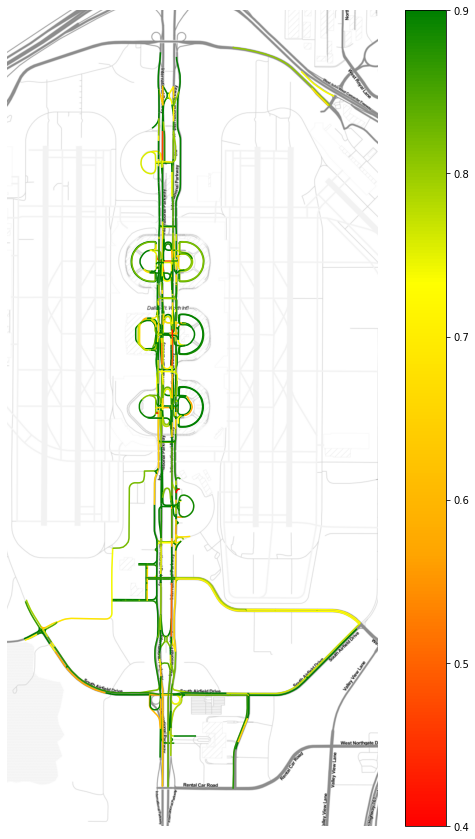

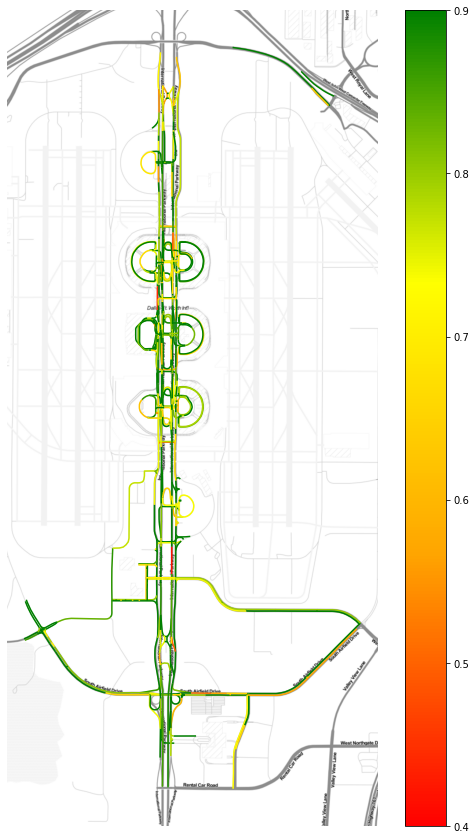

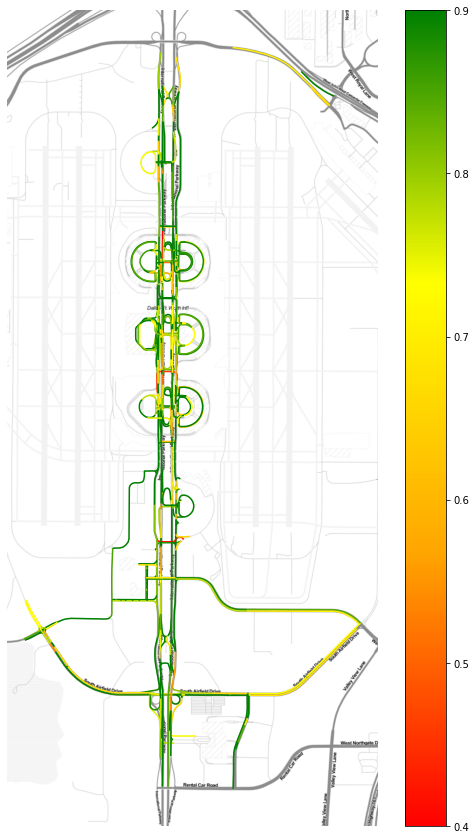

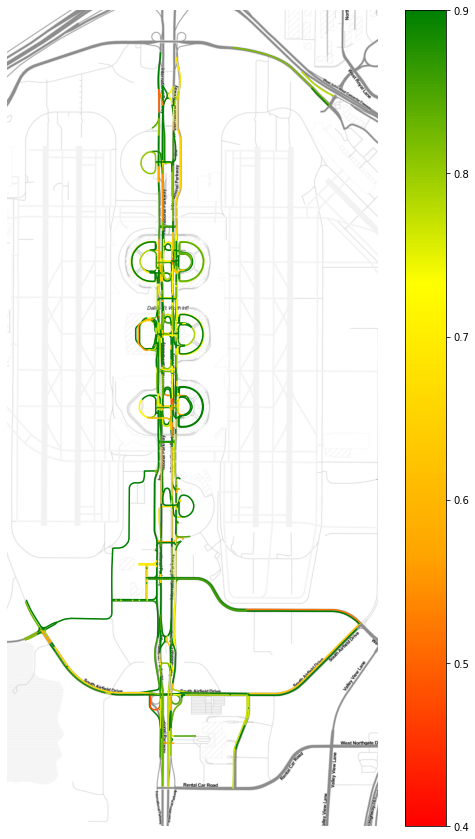

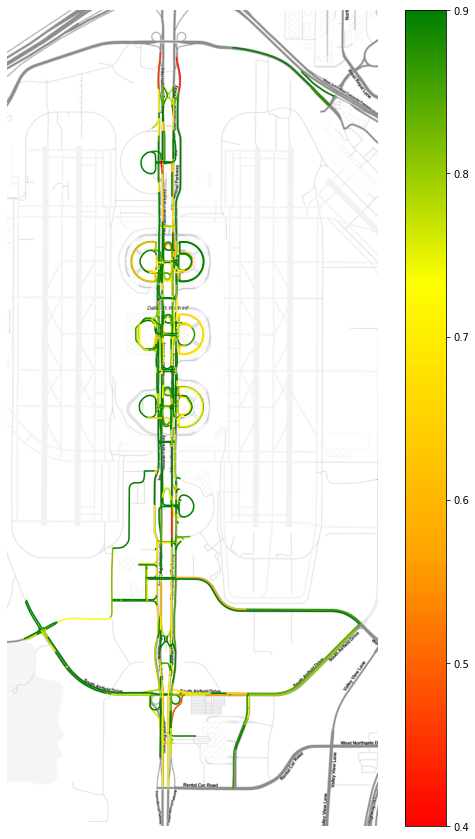

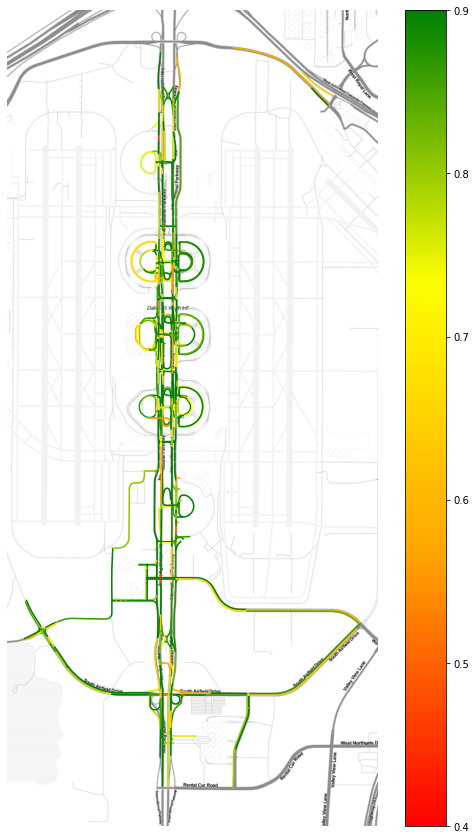

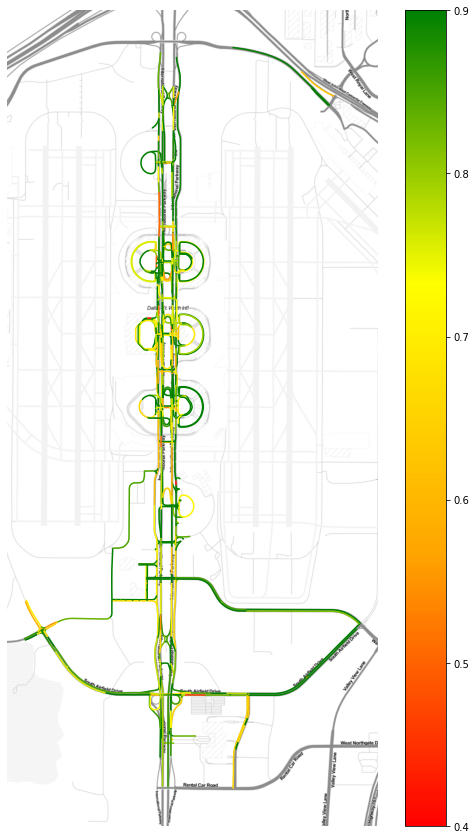

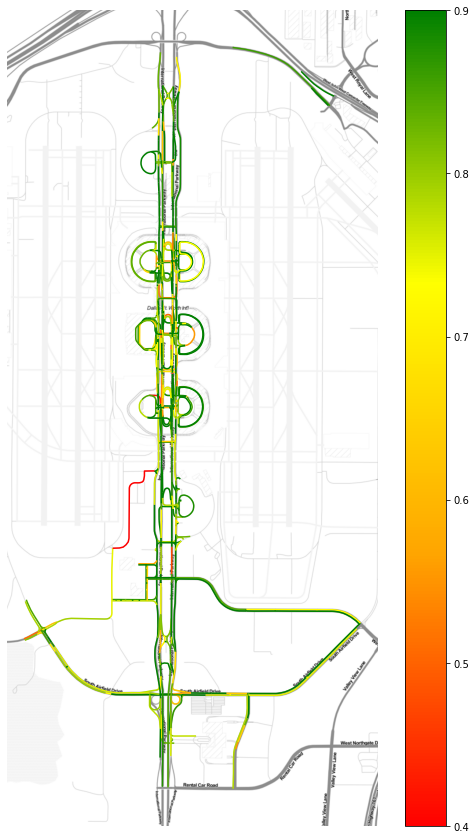

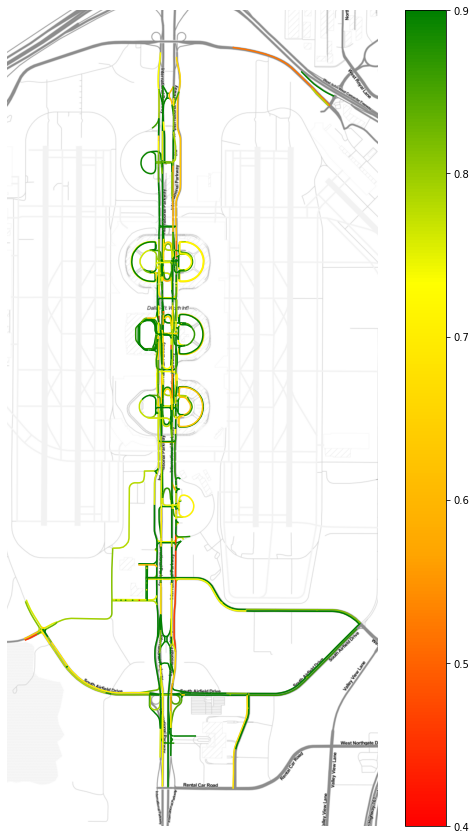

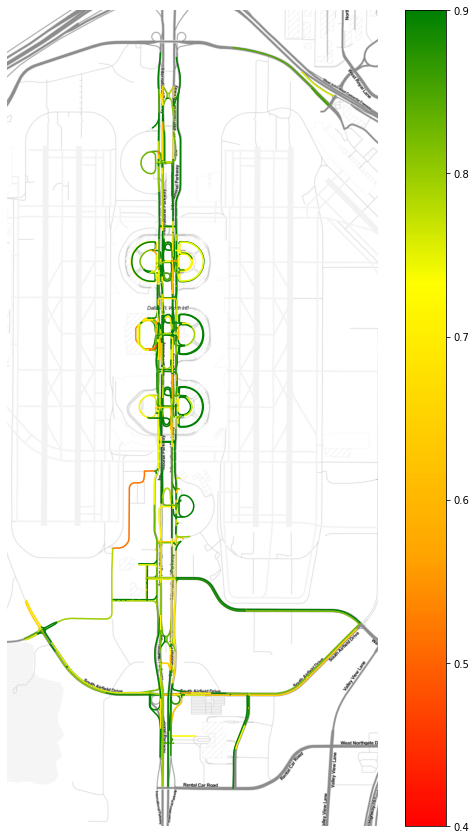

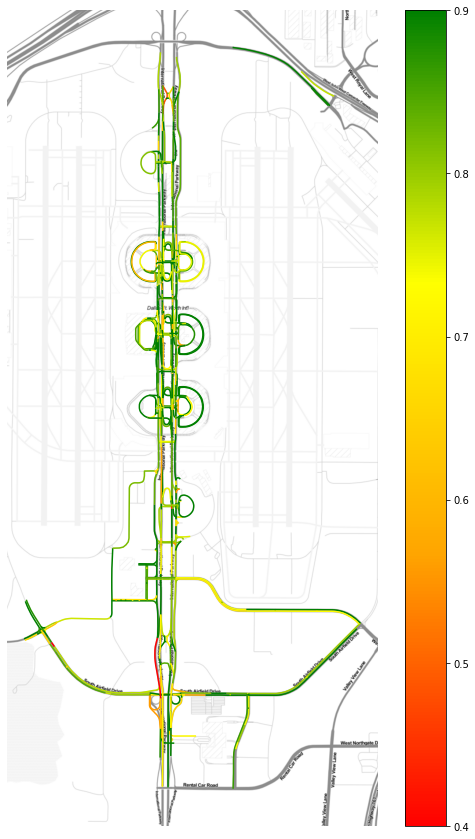

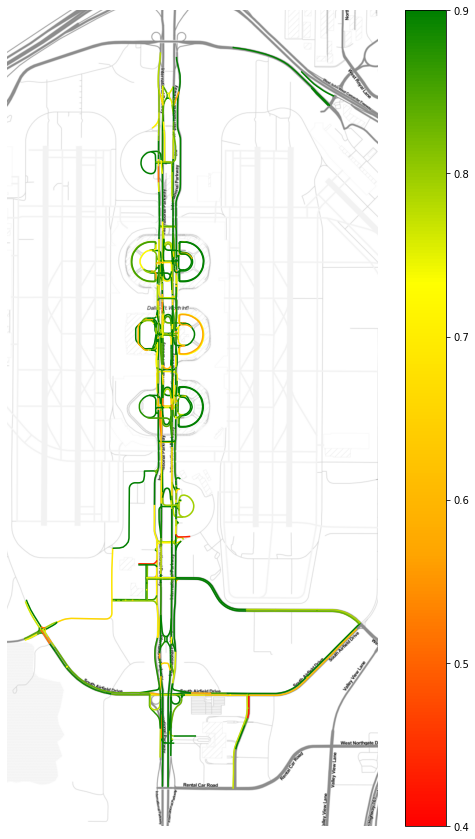

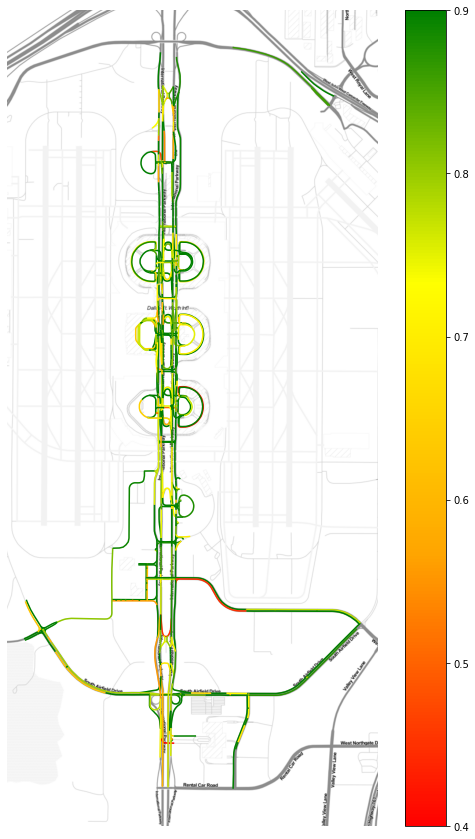

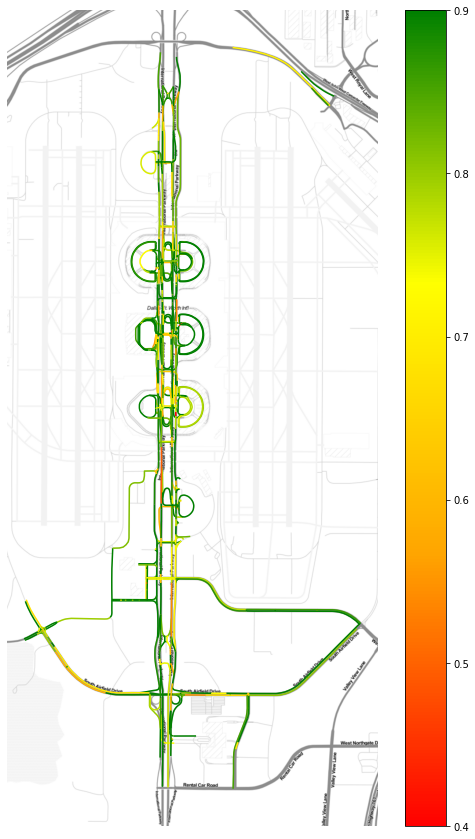

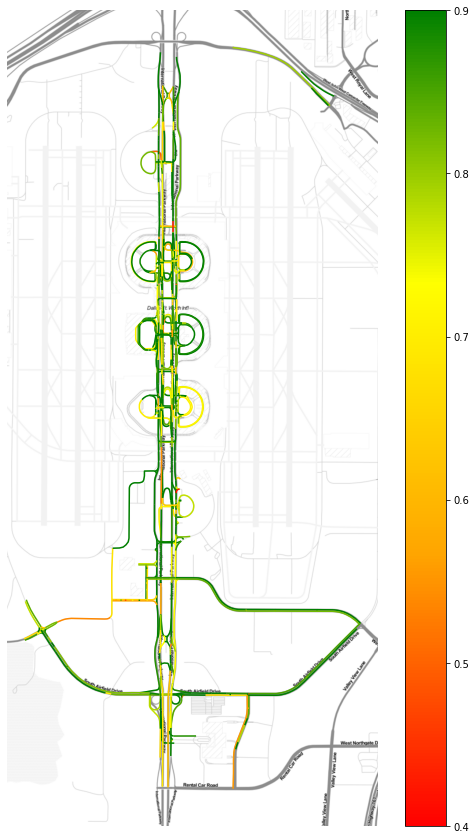

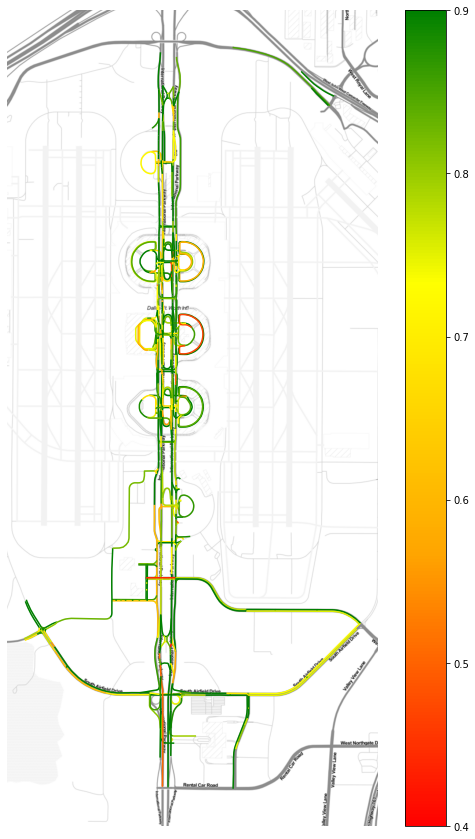

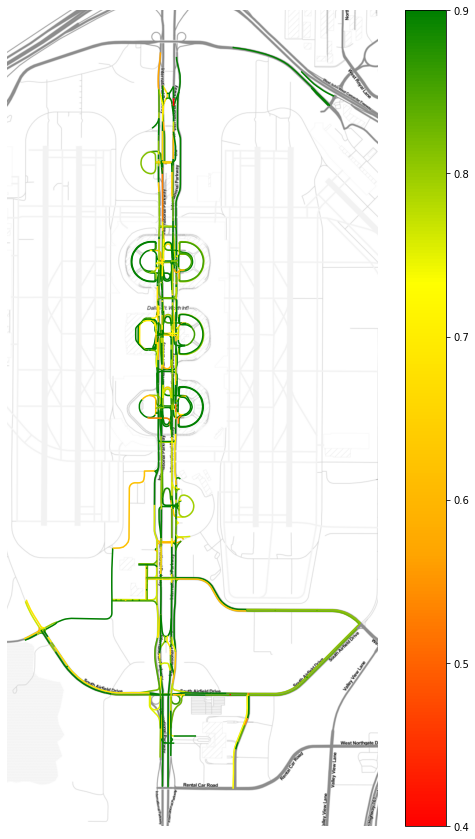

In [9]:

# ST_TONER = 'http://tile.stamen.com/toner/tileZ/tileX/tileY.png'
# ST_TONER_HYBRID = 'http://tile.stamen.com/toner-hybrid/tileZ/tileX/tileY.png'
# ST_TONER_LABELS = 'http://tile.stamen.com/toner-labels/tileZ/tileX/tileY.png'
# ST_TONER_LINES = 'http://tile.stamen.com/toner-lines/tileZ/tileX/tileY.png'
# ST_TONER_BACKGROUND = 'http://tile.stamen.com/toner-background/tileZ/tileX/tileY.png'
# ST_TONER_LITE = 'http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'

# ST_TERRAIN = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
# ST_TERRAIN_LABELS = 'http://tile.stamen.com/terrain-labels/tileZ/tileX/tileY.png'
# ST_TERRAIN_LINES = 'http://tile.stamen.com/terrain-lines/tileZ/tileX/tileY.png'
# ST_TERRAIN_BACKGROUND = 'http://tile.stamen.com/terrain-background/tileZ/tileX/tileY.png'

# ST_WATERCOLOR = 'http://tile.stamen.com/watercolor/tileZ/tileX/tileY.png'
count = 0

for i in tqdm_notebook(range(24)):
    ST_TONER_LITE = 'http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'   
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","orange","red"][::-1])



    cleaned['relativeSpeed'] = np.random.normal(.85,.15,507)
    tmp = cleaned.to_crs(epsg=3857)    
    ax = tmp.plot(figsize=(10,15),
                  column='relativeSpeed',
                     legend=True,
                     vmax=.9,
                     vmin=.4,
                     cmap=cmap)
    ctx.add_basemap(ax,zoom=15,url=ST_TONER_LITE,
                  )
    ax.set_axis_off()
    plt.savefig("frames/frame_{:04d}.png".format(count))
    count=count+1

# 4.b. Combine Frames for mp4


In [10]:
import cv2
import glob
from tqdm import tqdm_notebook

filenames = sorted(glob.glob("frames/*.png"))
frame = cv2.imread(filenames[0])
height, width, layers = frame.shape

filename = 'DFW_RelativeSpeed.mp4'
video = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'DIVX'), 1,  (width,height)) # 5, lower == slower

for image in tqdm_notebook(filenames):
#     print(image)
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

# Play video

In [11]:
!open DFW_RelativeSpeed.mp4

# 5. Plotting with Pandas and Cufflinks
First I will bild a fake dataframe and then with one line of code I will make a nice plot

> Pick your stock to win! I choose 3


In [12]:
test = pd.DataFrame()
test['seconds'] = np.arange(0,86000,300)
def convertSecondsToTime(seconds):
    return time.strftime('%H:%M:%S', time.gmtime(seconds))
test['time'] = test['seconds'].apply(convertSecondsToTime)

stock1 = []
stock2 = []
stock3 = []
val1 = 10; val2 = 10; val3 =10
for t in test['time']:
    val1 *= np.random.normal(1.005,.0055,1)[0]
    val2 *= np.random.normal(1.005,.0055,1)[0]
    val3 *= np.random.normal(1.005,.0055,1)[0]
    stock1.append(val1)
    stock2.append(val2)
    stock3.append(val3)
test['Stock_1'] = stock1
test['Stock_2'] = stock2
test['Stock_3'] = stock3

test.index = test.time
test.drop(columns=['time','seconds'],inplace=True)


In [13]:
test.iplot()

In [14]:
test.iplot(subplots=True,fill=True)

# Documentation

> [contextily map background](https://github.com/darribas/contextily)

> [plotting with geopandas](https://geopandas.org/mapping.html)
  
> [plotting with cufflinks](https://plot.ly/python/v3/ipython-notebooks/cufflinks/)
        
> [Color gradient maps (cmap) in geopandas](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html)